<br><br><center><h1 style="font-size:3em;color:#2467C0">Mini project 1</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="soccer.jpg" align="middle" style="width:500px;height:350px;"/></td>
<td>
<a href="https://www.kaggle.com">Kaggle</a>에서 제공하는 <a href="https://www.kaggle.com/hugomathien/soccer">축구 데이터</a>를 활용하여 데이터 분석을 경험한다. 본 데이터에서는 2008-2016년 동안의 유럽 축구 25,000개 경기와 10,000 이상의 선수를 포함하고 있다.
</td>
</tr>
</table>

<h1 style="font-size:2em;color:#2467C0">1. 데이터 살펴보기</h1>

<br> 아래와 같은 라이브러리를 import 한다.
<ul>
<li><b>sqllite3</b> (데이터베이스 관련)</li>
<li><b>pandas</b> and <b>numpy</b> (데이터 관리 관련)</li>
<li><b>matplotlib</b> (데이터 시각화 관련)</li>
<li>specific methods from <b>sklearn</b> (머신러닝 관련)

</ul>

In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

#### 데이터 불러오기

In [3]:
# 데이터베이스 사용을 위해 초기 셋팅 작업
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [4]:
df.tail()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0
183977,183978,102359,39902,2007-02-22 00:00:00,80.0,81.0,right,medium,low,74.0,...,88.0,53.0,38.0,32.0,30.0,9.0,9.0,78.0,7.0,15.0


<h1 style="font-size:2em;color:#2467C0">2. 데이터 살펴보기</h1>

Pandas의 dataframe을 활용하여 데이터의 column을 살펴본다.

In [5]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [6]:
len(df.columns)

42

In [8]:
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


데이터의 간단한 통계를 살펴본다.

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


<h1 style="font-size:2em;color:#2467C0">3. 데이터 클리닝: 누락된 데이터 관리하기</h1>

실제 데이터는 노이즈가 심한 경우가 많기 때문에 데이터 정제 작업이 필요하다.<br>

아래 코드에서는 전체 데이터에서 누락된 데이터가 얼마나 있는지 확인해본다.

In [10]:
df.shape

(183978, 42)

In [11]:
df.shape[0]

183978

In [12]:
#NULL 값의 존재에 대한 확인
df.isnull().any().any(), df.shape

(True, (183978, 42))

df.isnull().any().any() 에 대해서 하나씩 살펴보자.

In [13]:
# 값 하나하나에 대한 null인지 아닌지를 확인
df.isnull()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
183974,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
183975,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
183976,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
# 각 column에 대해 null값이 있는지 여부를 확인
# 하나라도 있다면 그 column에 대해서는 True를 출력
df.isnull().any()

id                     False
player_fifa_api_id     False
player_api_id          False
date                   False
overall_rating          True
potential               True
preferred_foot          True
attacking_work_rate     True
defensive_work_rate     True
crossing                True
finishing               True
heading_accuracy        True
short_passing           True
volleys                 True
dribbling               True
curve                   True
free_kick_accuracy      True
long_passing            True
ball_control            True
acceleration            True
sprint_speed            True
agility                 True
reactions               True
balance                 True
shot_power              True
jumping                 True
stamina                 True
strength                True
long_shots              True
aggression              True
interceptions           True
positioning             True
vision                  True
penalties               True
marking       

In [15]:
# 모든 컬럼에 대해 하나의 column에서라도 True가 나온다면 True
# 즉, 아래 코드는 dataframe에 있는 모든 값들에 대해서 단 하나의 값이라도 True가 나온다면,
# True를 리턴
df.isnull().any().any()

True

각 column에서 null을 가진 경우가 얼마나 많은지 확인해보자.

In [16]:
df.isnull().sum(axis=0)

# 183978 샘플에서 컬럼별로 null이 있는 갯수

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

## Null 값 삭제하기

In [17]:
# 삭제 전 row 갯수 확인
rows = df.shape[0]
rows

183978

In [18]:
# null 값의 row 삭제
df = df.dropna()

In [19]:
df.shape[0]

180354

null 값이 삭제된 후, 총 갯수가 줄어들었는지 확인해보자.

In [21]:
df.isnull().any().any(), df.shape

(False, (180354, 42))

In [22]:
df.isnull()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
183974,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
183975,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
183976,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
df.isnull().any()

id                     False
player_fifa_api_id     False
player_api_id          False
date                   False
overall_rating         False
potential              False
preferred_foot         False
attacking_work_rate    False
defensive_work_rate    False
crossing               False
finishing              False
heading_accuracy       False
short_passing          False
volleys                False
dribbling              False
curve                  False
free_kick_accuracy     False
long_passing           False
ball_control           False
acceleration           False
sprint_speed           False
agility                False
reactions              False
balance                False
shot_power             False
jumping                False
stamina                False
strength               False
long_shots             False
aggression             False
interceptions          False
positioning            False
vision                 False
penalties              False
marking       

In [24]:
df.isnull().any().any()

False

Row를 기준으로 데이터를 섞어줌으로써 데이터 순서에 따른 결과의 영향을 최소화 시킨다.

In [25]:
df = df.reindex(np.random.permutation(df.index))

<h1 style="font-size:2em;color:#2467C0">4. 선수의 overall_rating 예측하기</h1>

데이터 정제 작업 후, 데이터를 살펴보자.

### 데이터 확인

In [23]:
df.head(5)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
115637,115638,134906,25537,2016-02-11 00:00:00,74.0,74.0,right,medium,low,62.0,...,76.0,82.0,44.0,53.0,38.0,11.0,12.0,15.0,14.0,9.0
121831,121832,177126,46335,2015-09-25 00:00:00,72.0,72.0,right,medium,medium,69.0,...,71.0,73.0,28.0,35.0,33.0,9.0,16.0,13.0,15.0,6.0
117681,117682,209413,208388,2013-02-15 00:00:00,62.0,65.0,right,high,medium,62.0,...,45.0,40.0,70.0,66.0,61.0,7.0,5.0,13.0,12.0,10.0
152968,152969,194080,212389,2009-08-30 00:00:00,52.0,64.0,right,medium,medium,35.0,...,26.0,28.0,55.0,62.0,57.0,7.0,23.0,33.0,23.0,23.0
65662,65663,198426,213922,2015-09-21 00:00:00,70.0,71.0,right,medium,medium,70.0,...,71.0,72.0,28.0,31.0,31.0,12.0,13.0,7.0,14.0,11.0


우리는 일부 column에 대해서 그림을 그려보는 것을 진행해본다.

첫 번째 열을 무시하자. 이것은 데이터의 색인 역할을하는 고유 식별자이기 때문이다.

<b>Note:</b> 이제부터는 설명에서는 column을 "feature"로 언급한다.

In [26]:
df[:10][['penalties', 'overall_rating']]

,penalties,overall_rating
59584,64.0,64.0
166668,25.0,68.0
137081,35.0,66.0
94621,49.0,65.0
23865,56.0,66.0
159195,61.0,68.0
20905,54.0,72.0
104343,70.0,74.0
42442,48.0,69.0
95977,72.0,70.0


## Feature Correlation Analysis 

다음으로, 'penalty'가 'overall_rating'과 상관 관계가 있는지 확인한다. 

이번에는 모든 행과 상관 함수 내에서 유사한 선택 연산을 사용한다.

# Are these correlated (using Pearson's correlation coefficient) ?

df['overall_rating'].corr(df['penalties'])

In [25]:
df['overall_rating'].corr(df['penalties']) # correlation

0.39271510791118863

이 두 컬럼에 대한 Pearson의 상관 계수는 0.39 이다.

피어슨은 -1 ~ +1 사이의 값을 갖는데, 0.39면 약하게 긍정적인 관계를 가지고 있다고 볼 수 있다.

## Create a list of potential Features that you want to measure correlation with

In [26]:
potentialFeatures = ['acceleration', 'curve', 'free_kick_accuracy', 'ball_control', 'shot_power', 'stamina']

아래의 for 루프는 플레이어의 "overall_rating"의 상관 계수를 목록에 추가 한 각 기능을 잠재성으로 출력한다.

In [27]:
# check how the features are correlated with the overall ratings

for f in potentialFeatures:
    related = df['overall_rating'].corr(df[f])
    print("%s: %f" % (f,related))

acceleration: 0.243998
curve: 0.357566
free_kick_accuracy: 0.349800
ball_control: 0.443991
shot_power: 0.428053
stamina: 0.325606


## Which features have the highest correlation with overall_rating?

이전 셀에서 출력한 값을 보면 두 개가 "ball_control"(0.44)과 "shot_power"(0.43)임을 알 수 있다. 

따라서 이 두 기능은 "overall_rating"과 더 높은 상관 관계가 있는 것으로 보인다.

<h1 style="font-size:2em;color:#2467C0">5. Data Visualization</h1>

다음으로 "overall_rating"을 사용하여 각 피쳐의 상관 계수를 그림으로 그린다.

먼저 열을 선택하고 "상관 관계"라는 상관 계수가있는 목록을 만든다.

In [28]:
cols = ['potential',  'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

아래의 comprehensive list 임을 확인하자.

In [29]:
# create a list containing Pearson's correlation between 'overall_rating' with each column in cols
correlations = [ df['overall_rating'].corr(df[f]) for f in cols ]

In [30]:
correlations

[0.7654346716757736,
 0.35732018035432,
 0.33007854277118526,
 0.31332410055165105,
 0.4582426558154409,
 0.3617394998725064,
 0.35419060093846666,
 0.35756576910945187,
 0.349800311442388,
 0.4345249915571983,
 0.4439907628262989,
 0.2439984883712963,
 0.25304806290254556,
 0.23996282078849313,
 0.7718560966627339,
 0.1602107785208076,
 0.4280531322219391,
 0.2589783181304963,
 0.3256056577869247,
 0.31568376240758006,
 0.39266797289955624,
 0.3227818681524762,
 0.2490940256618213,
 0.3689776391472519,
 0.43149329504794115,
 0.39271510791118863,
 0.1321847383517333,
 0.16398609375977694,
 0.12805401295121172,
 0.027674967162302423,
 0.006717294838212127,
 0.02879910388429602,
 0.008029270276245384,
 0.007803569907558582]

In [31]:
len(cols), len(correlations)

(34, 34)

선택된 피쳐의 수와 계산 된 상관 관계가 동일한 지 확인한다 (예 : 두 경우 모두 34). 

다음 셀 몇 개는 pandas plaotting 함수를 사용하여 이러한 상관 표시와 열 이름의 2차원의 그래프를 만드는 코드 라인을 보여준다.

In [32]:
# create a function for plotting a dataframe with string columns and numeric values

def plot_dataframe(df, y_label):  
    color='coral'
    fig = plt.gcf() # Figure 객체를 얻기 위한 명령어: gcf()
    fig.set_size_inches(10, 5)
    plt.ylabel(y_label)

    ax = df.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.attributes, rotation=75)
    plt.show()

In [38]:
# create a dataframe using cols and correlations

df2 = pd.DataFrame({'attributes': cols, 'correlation': correlations}) 

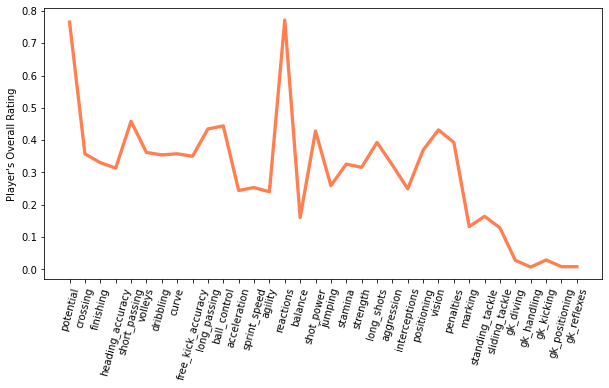

In [39]:
# let's plot above dataframe using the function we created
    
plot_dataframe(df2, 'Player\'s Overall Rating')

<h1 style="font-size:1.5em;color:#FB41C4">Analysis of Findings</h1>

이제 우리가 계획 한 것을 분석 해보자. 

플레이어의 전반적인 평점을 예측해야한다고 가정한다. 

어떤 5 가지 플레이어 특성을 요구하는가?
<br><br>
<b>Hint:</b> 가장 높은 상관 계수를 가진 다섯 가지 특징은 무엇인가?

## Select Features on Which to Group Players

In [33]:
# 플레이어들을 그룹핑 하기 위해 어떤 특성을 사용할 것인가?
select5features = ['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']
select5features

['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']

In [34]:
# 선택된 특성을 기반으로 df_select를 새로 만듬
df_select = df[select5features].copy(deep=True)

In [42]:
# 아래와 같이 해도 무방함
df_select = df[select5features]

In [43]:
df_select.head()

,gk_kicking,potential,marking,interceptions,standing_tackle
115637,15.0,74.0,44.0,45.0,53.0
121831,13.0,72.0,28.0,37.0,35.0
117681,13.0,65.0,70.0,66.0,66.0
152968,33.0,64.0,55.0,31.0,62.0
65662,7.0,71.0,28.0,59.0,31.0


## Perform KMeans Clustering

이제는 KMeans라는 기계 학습 방법을 사용하여 값 (즉, gk_kicking, potential, marking, interceptions, standing_tackle)을 클러스터링한다. 

네 개의 클러스터를 기준으로 진행한다. 

In [36]:
# 정규화 과정 진행. 이는 차후 수업에서 더 자세히 다룸
data = scale(df_select)

# 클러스터 갯수 지정
noOfClusters = 4

# 모델 훈련 시작. 생각보다 간단함
model = KMeans(init='k-means++', n_clusters=noOfClusters, n_init=20).fit(data)

In [37]:
print(90*'_')
print("\nCount of players in each cluster")
print(90*'_')

pd.value_counts(model.labels_, sort=False) # value_counts 는 각 label(클러스터)에 해당되는 샘플 갯수를 리턴함

__________________________________________________________________________________________

Count of players in each cluster
__________________________________________________________________________________________


0    23805
1    50049
2    55864
3    50636
dtype: int64